Import basic tools and Dance Object, used for turning joint-position data into a dataframe of features

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../../")
from DanceProj1.DanceObj import Dance

Use Dance class obj on data and make feature-dataframe. See data_proc.py for details.

In [2]:
from DanceProj1.data_proc import get_data

aistpath = '../../aist_keypoints' #path to 3d keypoints data
dataBM, dataFM = get_data(aistpath)    #get data. Comes with joint-position-frame arrays and an id

Make sure data is loaded

In [3]:
print('data is dict with keys = genres', dataBM.keys())
print('values are tuples (pairs) = (posdata, id)')
print('first break piece data shape (frames, joints, xyz):', dataBM['Break'][0][0].shape)
print('id of first break piece: ', dataBM['Break'][0][1])

data is dict with keys = genres dict_keys(['Break', 'Pop', 'Lock', 'Midhop', 'LAhop', 'House', 'Waack', 'Krump', 'Street Jazz', 'Ballet Jazz'])
values are tuples (pairs) = (posdata, id)
first break piece data shape (frames, joints, xyz): (15, 443, 3)
id of first break piece:  gBR_sBM_cAll_d05_mBR5_ch10


Turn the data into Dance objects. This is a class that has methods for computing features. See DanceObj.py for details - it is contained in data_to_features.

In [4]:
from DanceProj1.data_proc import data_to_features

dfBM, dfFM = data_to_features(dataBM, dataFM)

In [5]:
print('There are', len(dfFM.index), 'Advanced sequences and', len(dfBM.index), 'Basic sequences')

There are 200 Advanced sequences and 1199 Basic sequences


Check the dataframes

In [6]:
print('There are 114 features, plus the genre and id columns')
dfBM.head()

There are 114 features, plus the genre and id columns


Expandedness  Expandedness_max  Expandedness_min  Expandedness_std  \
0   1067.622148       1197.751677        965.124391         50.415361   
1   1083.575293       1349.850117        837.155589        142.153402   
2    985.561049       1168.555879        765.665652        104.975424   
3   1020.270512       1164.328733        812.360147         80.674363   
4   1107.946863       1209.577689        997.165851         49.744991   

   Expandednessvel  Expandednessvel_max  Expandednessvel_min  \
0      1397.204275          2267.395620           150.215917   
1      1524.272988          2252.131204           616.825463   
2      1907.621137          3438.121220           306.242255   
3      2902.893592          4333.351166           776.192587   
4      1201.883329          2070.096625           113.670714   

   Expandednessvel_std  Expandednessacc  Expandednessacc_max  ...  \
0           542.206065      7089.581203         12609.656893  ...   
1           333.127678      8006.105192         11932.971845  ...   
2           872.391745      8871.908429         13776.537158  ...   
3           874.548784     13713.203307         19446.354021  ...   
4           435.443006      5814.821126         11567.520691  ...   

   Contracorr_ReLk_prominence2_j  Contracorr_ReLk_prominence3_j  \
0                   5.596054e+08                   4.063632e+08   
1                   6.038276e+08                   5.554508e+08   
2                   4.701707e+08                   3.745193e+08   
3                   7.964929e+08                   5.529205e+08   
4                   2.086062e+08                   1.969258e+08   

   Contracorr_ReLk_prominence_j_std  Contracorr_LeRk_height_j  \
0                      9.199850e+07              1.587455e+08   
1                      1.250955e+08              1.300953e+08   
2                      6.341358e+07              4.185444e+08   
3                      2.676955e+08              3.259697e+08   
4                      4.661264e+07              9.989042e+07   

   Contracorr_LeRk_prominence1_j  Contracorr_LeRk_prominence2_j  \
0                   3.348337e+08                   3.047836e+08   
1                   8.625915e+08                   6.590568e+08   
2                   8.902319e+08                   6.626244e+08   
3                   7.382507e+08                   5.326464e+08   
4                   2.320892e+08                   1.750242e+08   

   Contracorr_LeRk_prominence3_j  Contracorr_LeRk_prominence_j_std  \
0                   2.417569e+08                      3.878523e+07   
1                   6.263198e+08                      1.045214e+08   
2                   6.419400e+08                      1.124880e+08   
3                   2.906787e+08                      1.829214e+08   
4                   1.681763e+08                      2.865146e+07   

                           id  Genre  
0  gBR_sBM_cAll_d05_mBR5_ch10  Break  
1  gBR_sBM_cAll_d05_mBR1_ch03  Break  
2  gBR_sBM_cAll_d06_mBR3_ch09  Break  
3  gBR_sBM_cAll_d06_mBR2_ch08  Break  
4  gBR_sBM_cAll_d05_mBR4_ch10  Break  

[5 rows x 116 columns]

In [7]:
#drop id column and genre column
dfFM.drop(['id', 'Genre'], axis=1, inplace=True)
dfBM.drop(['id', 'Genre'], axis=1, inplace=True) 

<function matplotlib.pyplot.show(close=None, block=None)>

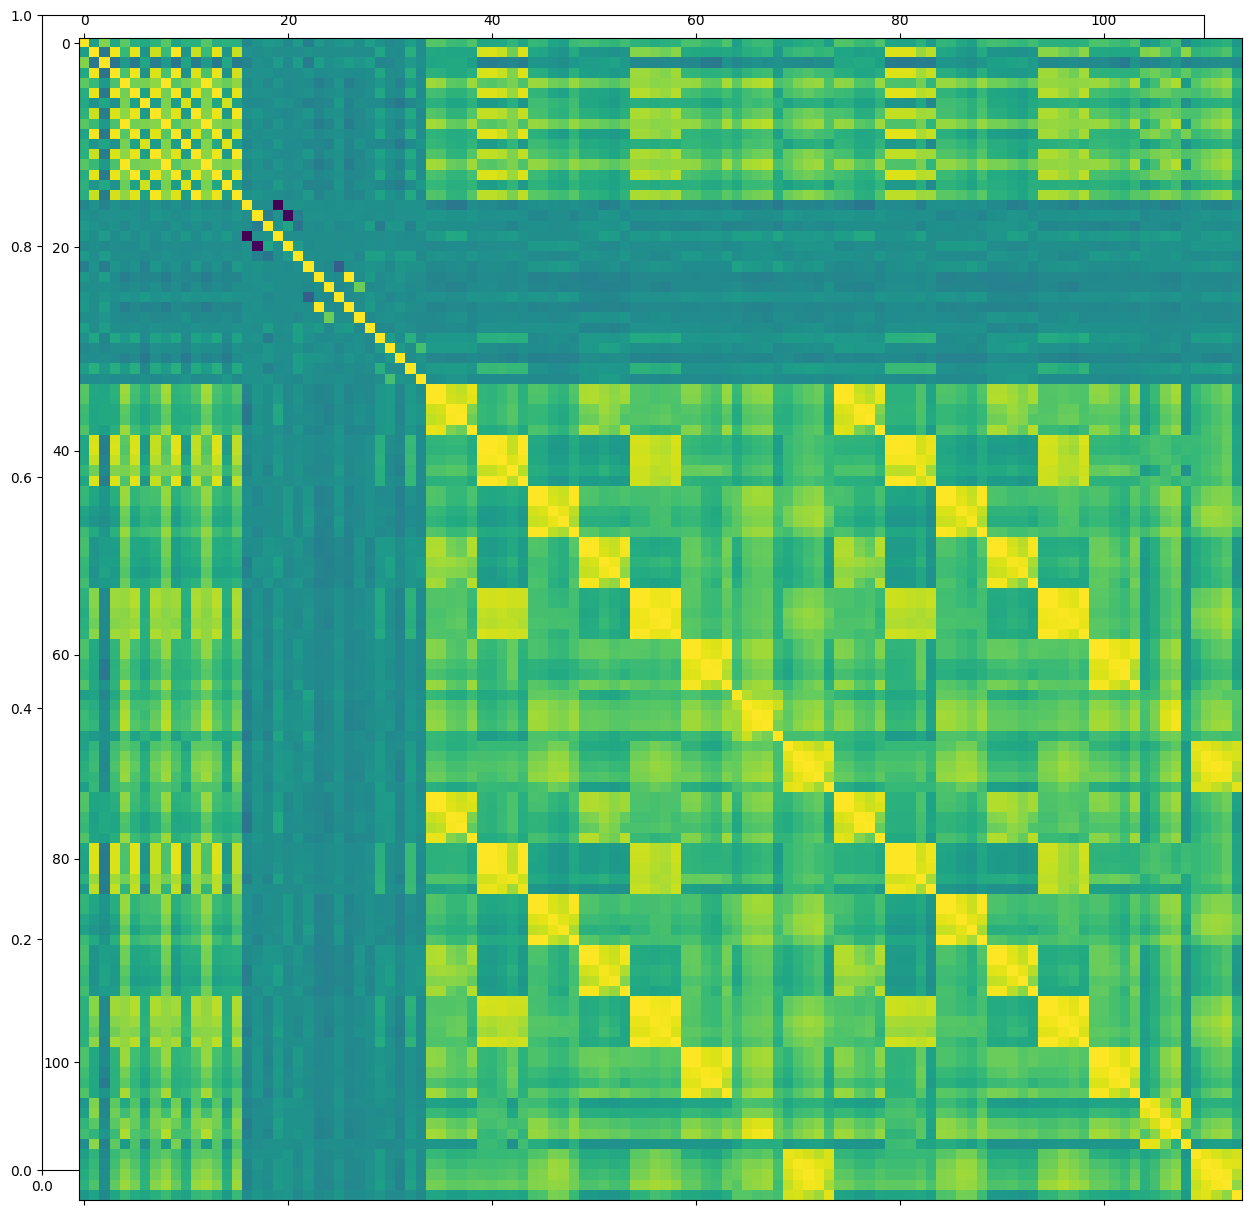

In [8]:
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(15, 15))
plt.matshow(dfFM.corr(), interpolation='nearest', fignum=1)
plt.savefig('AdvMatCorr.png')
plt.show

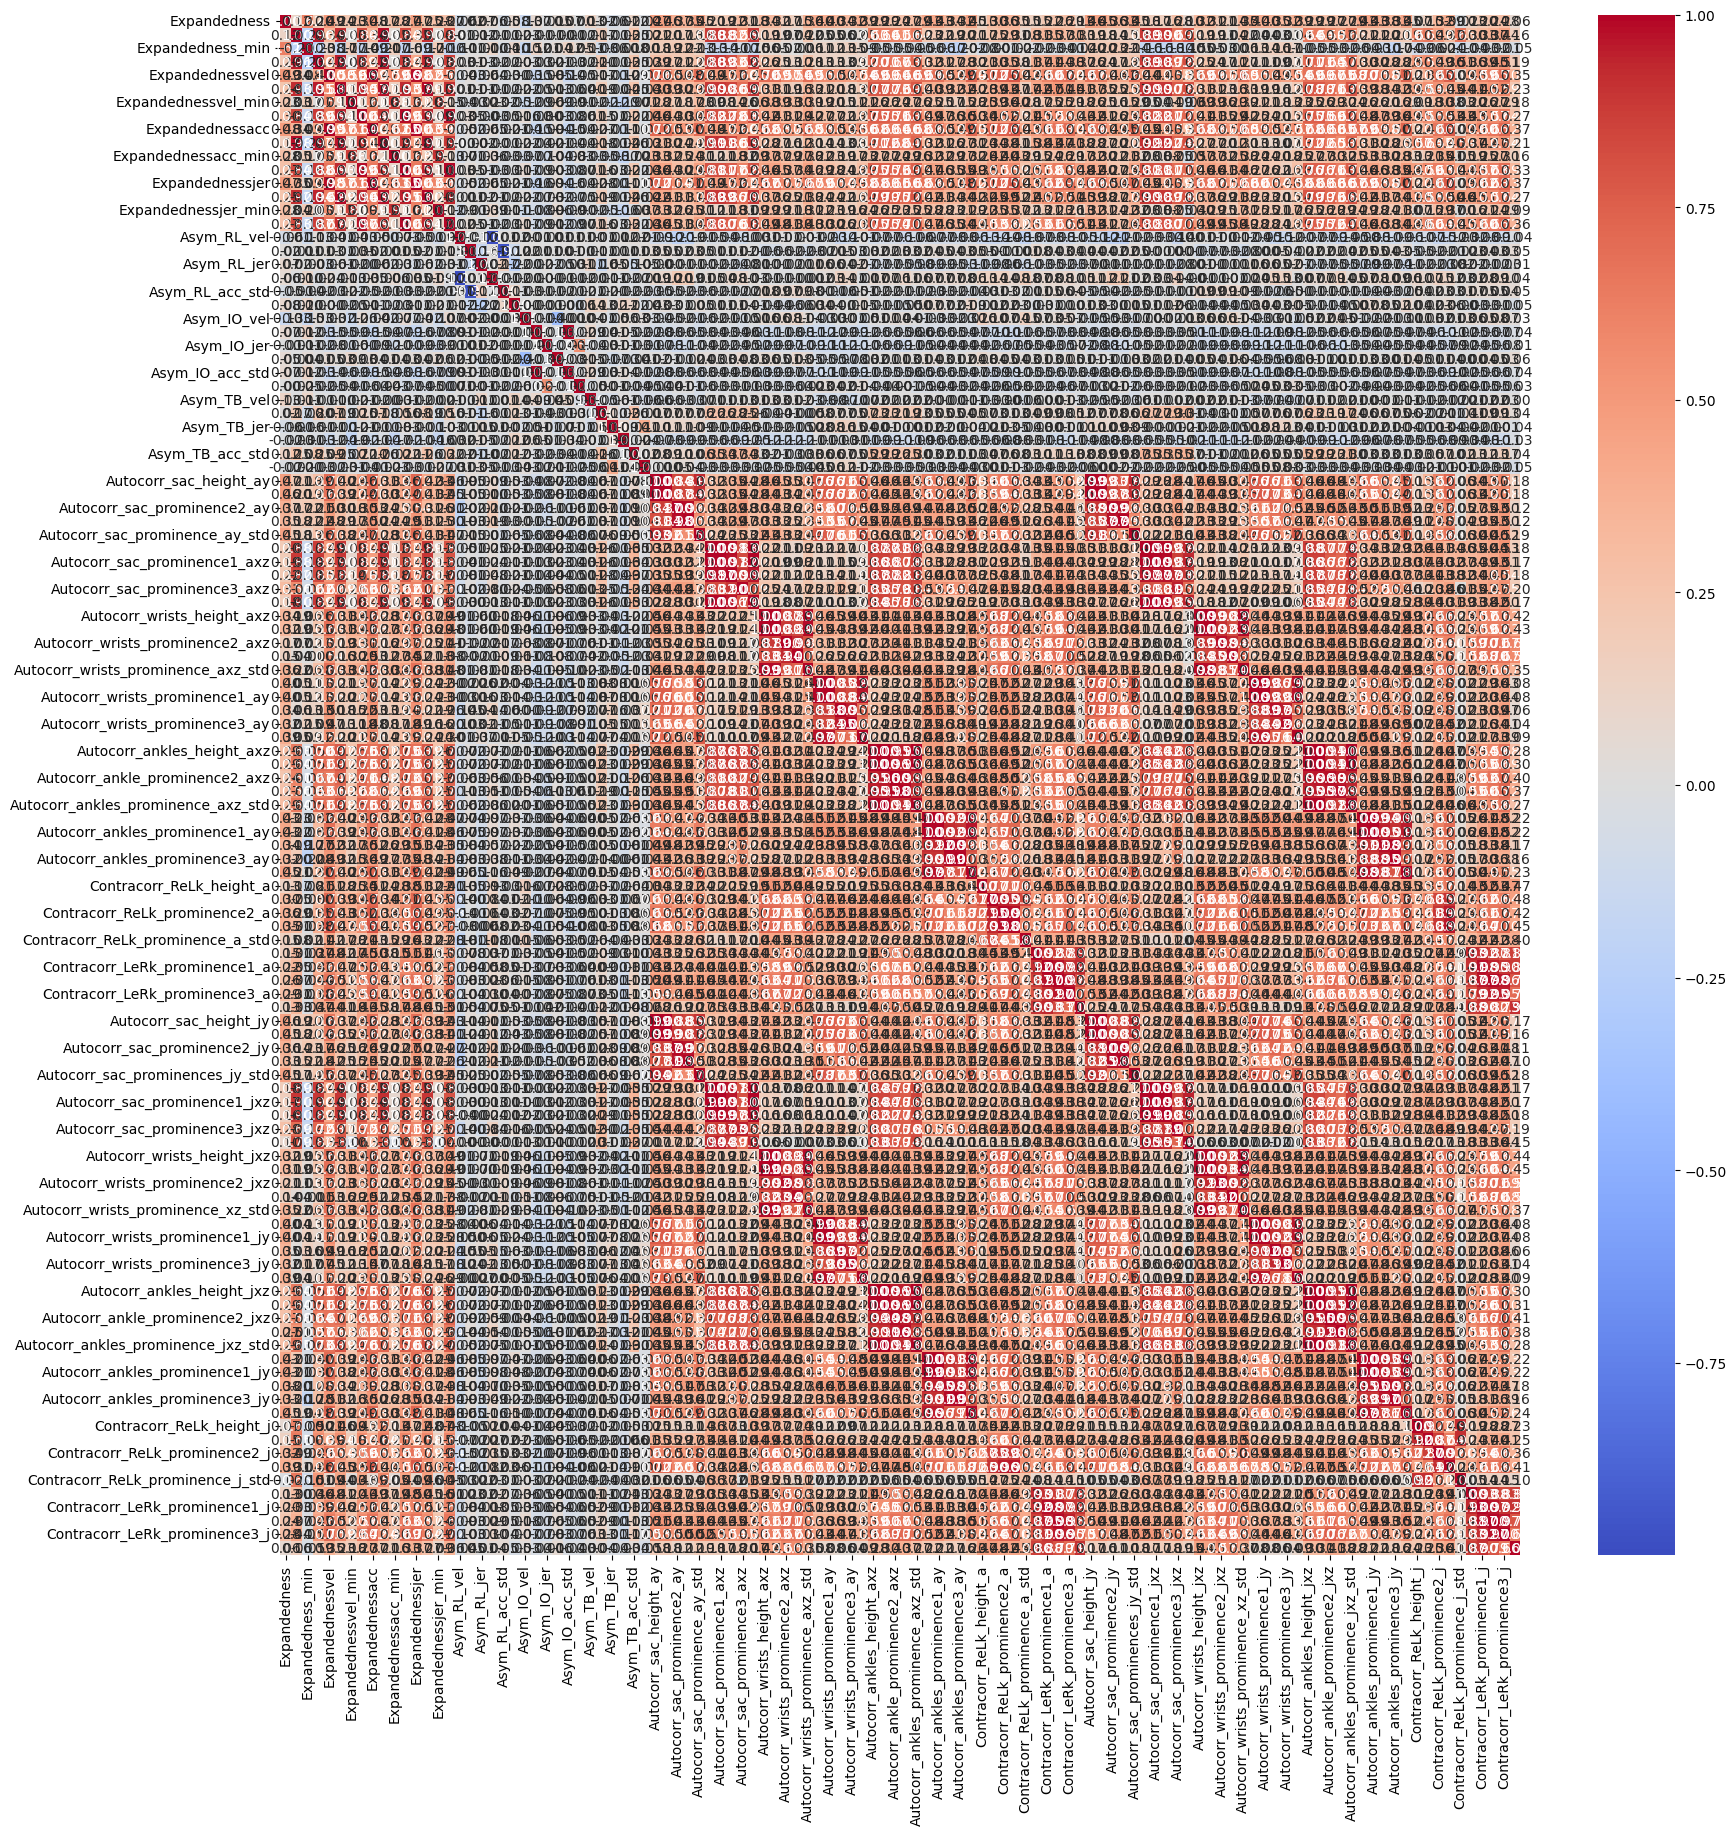

In [9]:
#plot correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(dfFM.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()
#note bounciness relates to expantion - negative with min distance, positive with higher derivaties

In [10]:
dfFExpa = dfFM[['Expandedness','Expandedness_max','Expandedness_min','Expandedness_std',
                'Expandednessvel','Expandednessvel_max','Expandednessvel_min','Expandednessvel_std',
                'Expandednessacc','Expandednessacc_max','Expandednessacc_min','Expandednessacc_std',
                'Expandednessjer','Expandednessjer_max','Expandednessjer_min','Expandednessjer_std']]
dfFExpa.head()
labels = ['meanD','maxD','minD','stdD','meanV','maxV','minV','stdV','meanA','maxA','minA','stdA','meanJ','maxJ','minJ','stdJ']

In [11]:
dfFAsym = dfFM[['Asym_RL_vel','Asym_RL_acc','Asym_RL_jer','Asym_RL_vel_std','Asym_RL_acc_std','Asym_RL_jer_std',
                'Asym_IO_vel','Asym_IO_acc','Asym_IO_jer','Asym_IO_vel_std','Asym_IO_acc_std','Asym_IO_jer_std',
                'Asym_TB_vel','Asym_TB_acc','Asym_TB_jer','Asym_TB_vel_std','Asym_TB_acc_std','Asym_TB_jer_std']]
dfFAsym.head()

Asym_RL_vel  Asym_RL_acc   Asym_RL_jer  Asym_RL_vel_std  Asym_RL_acc_std  \
0  2839.095566  3202.027147  -8145.973932         6.328799        12.722745   
1  1330.346396 -3083.023419 -94451.348976        15.941952        23.685070   
2  2425.553893 -3654.077082   2469.866960        19.227707        94.886841   
3  2195.992765  2114.188199   -759.887878         8.031298        13.894322   
4 -6285.452239   233.536330  -2404.161128        43.765981         7.252619   

   Asym_RL_jer_std  Asym_IO_vel  Asym_IO_acc  Asym_IO_jer  Asym_IO_vel_std  \
0        28.359090  -668.929032   391.013065   681.798334         6.744634   
1       550.531203  2741.020523  1349.639953  1217.867216         9.775028   
2         7.275904   444.831208  1280.981000   483.945331         4.820339   
3         4.462379 -4113.264292 -1693.543511  5136.552538        20.245567   
4        23.728525  4342.295105  -343.923865   673.866125        22.067514   

   Asym_IO_acc_std  Asym_IO_jer_std   Asym_TB_vel    Asym_TB_acc  \
0         3.742970         3.295718  31826.858380    5996.022118   
1         2.120467         4.046590  60798.929594     581.691224   
2         7.644919         3.303405   5204.916134    3145.778913   
3        33.216754        24.365080   -700.026808   16099.811329   
4         3.317154         5.796299   4837.939163  170407.831099   

    Asym_TB_jer  Asym_TB_vel_std  Asym_TB_acc_std  Asym_TB_jer_std  
0  18421.535723       153.965681        35.207518       116.015953  
1   -744.166022       272.992760         3.626860         8.310445  
2  -2470.506985        21.482582        10.835765        17.193266  
3   1011.873370        13.078973       257.033904         5.895168  
4   7317.267788        24.239303      1006.592803        69.072172

In [12]:
#dfFAutocorr is dfFM without the Expa columns and without the Asym columns
dfFAutocorr = dfFM.drop(['Expandedness','Expandedness_max','Expandedness_min','Expandedness_std',
                'Expandednessvel','Expandednessvel_max','Expandednessvel_min','Expandednessvel_std',
                'Expandednessacc','Expandednessacc_max','Expandednessacc_min','Expandednessacc_std',
                'Expandednessjer','Expandednessjer_max','Expandednessjer_min','Expandednessjer_std',
                'Asym_RL_vel','Asym_RL_acc','Asym_RL_jer','Asym_RL_vel_std','Asym_RL_acc_std','Asym_RL_jer_std',
                'Asym_IO_vel','Asym_IO_acc','Asym_IO_jer','Asym_IO_vel_std','Asym_IO_acc_std','Asym_IO_jer_std',
                'Asym_TB_vel','Asym_TB_acc','Asym_TB_jer','Asym_TB_vel_std','Asym_TB_acc_std','Asym_TB_jer_std'], axis=1)

dfFAutocorr.head()

Autocorr_sac_height_ay  Autocorr_sac_prominence1_ay  \
0            6.224804e+07                 1.065469e+08   
1            3.146013e+07                 5.224713e+07   
2            6.128584e+07                 9.879583e+07   
3            2.714013e+07                 4.113260e+07   
4            1.041326e+08                 1.838576e+08   

   Autocorr_sac_prominence2_ay  Autocorr_sac_prominence3_ay  \
0                 4.364007e+07                 2.969293e+07   
1                 1.934933e+07                 1.322086e+07   
2                 6.081547e+07                 3.611133e+07   
3                 1.625487e+07                 1.490241e+07   
4                 1.064136e+08                 9.489369e+07   

   Autocorr_sac_prominence_ay_std  Autocorr_sac_height_axz  \
0                    3.343040e+07             7.566739e+07   
1                    1.713629e+07             1.452071e+08   
2                    2.578145e+07             9.051249e+07   
3                    1.205890e+07             9.365190e+07   
4                    3.950366e+07             1.459398e+09   

   Autocorr_sac_prominence1_axz  Autocorr_sac_prominence2_axz  \
0                  1.049867e+08                  2.483826e+07   
1                  2.277101e+08                  4.488698e+07   
2                  1.317801e+08                  4.101212e+07   
3                  1.282924e+08                  3.488304e+07   
4                  2.333779e+09                  4.017202e+08   

   Autocorr_sac_prominence3_axz  Autocorr_sac_prominence_axz_std  ...  \
0                  1.770948e+07                     3.956978e+07  ...   
1                  3.883394e+07                     8.764520e+07  ...   
2                  3.735732e+07                     4.367538e+07  ...   
3                  2.982416e+07                     4.527310e+07  ...   
4                  1.940414e+08                     9.634695e+08  ...   

   Contracorr_ReLk_height_j  Contracorr_ReLk_prominence1_j  \
0              6.667224e+08                   1.781491e+09   
1              1.027959e+09                   1.809455e+09   
2              1.806136e+08                   1.391831e+09   
3              3.152821e+08                   8.958282e+08   
4              4.569141e+08                   2.072233e+09   

   Contracorr_ReLk_prominence2_j  Contracorr_ReLk_prominence3_j  \
0                   1.664854e+09                   1.434043e+09   
1                   1.614114e+09                   1.565013e+09   
2                   1.208936e+09                   1.112264e+09   
3                   8.673836e+08                   7.578112e+08   
4                   1.745922e+09                   1.598506e+09   

   Contracorr_ReLk_prominence_j_std  Contracorr_LeRk_height_j  \
0                      1.443755e+08              7.402209e+07   
1                      1.055785e+08              3.317929e+08   
2                      1.159281e+08              3.778749e+08   
3                      5.950155e+07              1.357860e+08   
4                      1.979416e+08              4.219170e+09   

   Contracorr_LeRk_prominence1_j  Contracorr_LeRk_prominence2_j  \
0                   1.229382e+09                   1.192352e+09   
1                   1.771329e+09                   1.737268e+09   
2                   1.274994e+09                   9.255891e+08   
3                   6.830069e+08                   5.732215e+08   
4                   7.735069e+09                   6.359036e+09   

   Contracorr_LeRk_prominence3_j  Contracorr_LeRk_prominence_j_std  
0                   1.179422e+09                      2.117252e+07  
1                   1.393618e+09                      1.705940e+08  
2                   9.058842e+08                      1.695464e+08  
3                   5.102448e+08                      7.138754e+07  
4                   5.894639e+09                      7.814742e+08  

[5 rows x 80 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

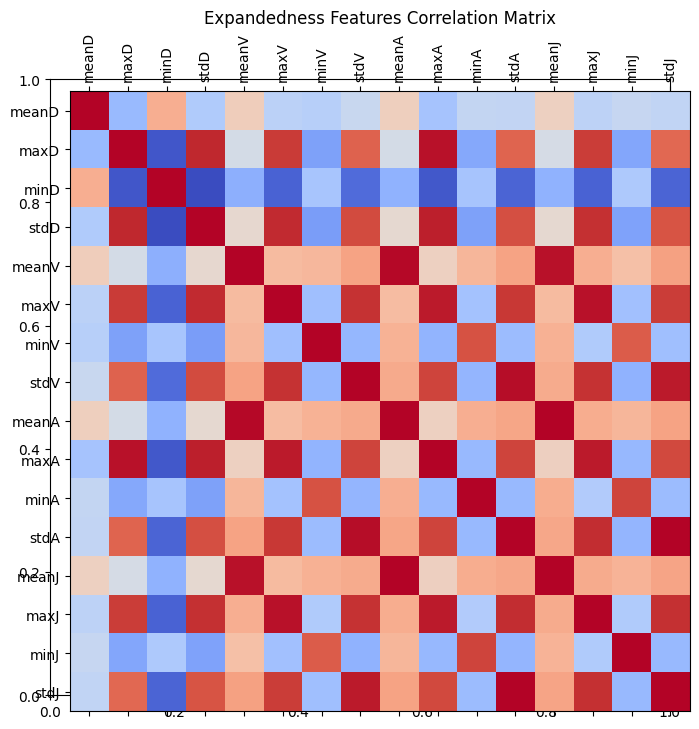

In [16]:
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(8, 8))
labelsExpa = ['meanD','maxD','minD','stdD','meanV','maxV','minV','stdV','meanA','maxA','minA','stdA','meanJ','maxJ','minJ','stdJ']
plt.matshow(dfFExpa.corr(), interpolation='nearest', fignum=1, cmap='coolwarm')
plt.xticks(range(len(labelsExpa)), labelsExpa, rotation=90)
plt.yticks(range(len(labelsExpa)), labelsExpa)
plt.savefig('AdvExpaMatCorr.png')
plt.title('Expandedness Features Correlation Matrix')
plt.show
#notes
#means and maxes are not correlated, mean and min are. Min is not correlated with anything else
#maxes and std are correlated, particularly Distance and Accel
#across Vel, Acc and Jer, maxes and stds are all correlated, and somewhat with means. 
#mins across derivatives are only correlated with each other

<function matplotlib.pyplot.show(close=None, block=None)>

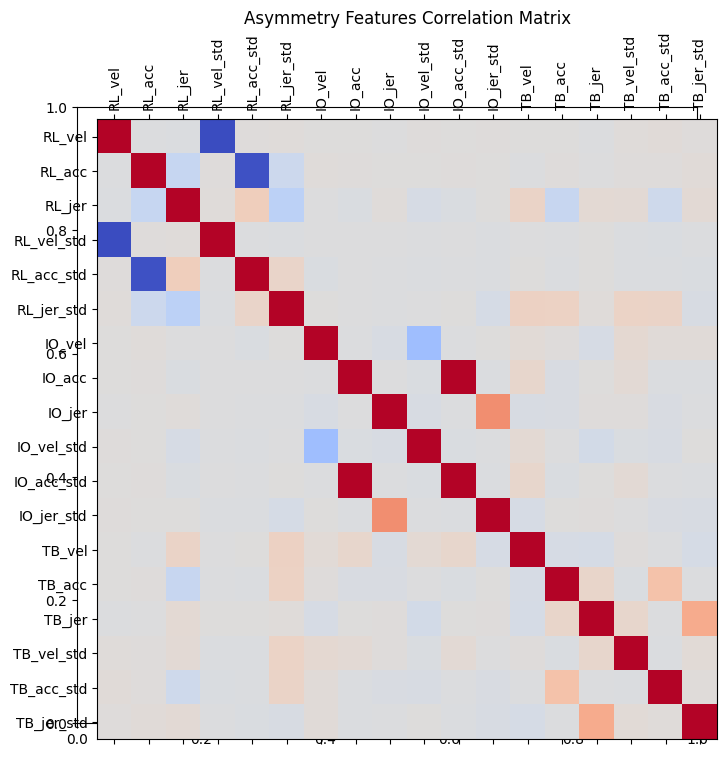

In [15]:
fig = plt.subplots(figsize=(8, 8))
labelsAsym = ['RL_vel','RL_acc','RL_jer','RL_vel_std','RL_acc_std','RL_jer_std',
                'IO_vel','IO_acc','IO_jer','IO_vel_std','IO_acc_std','IO_jer_std',
                'TB_vel','TB_acc','TB_jer','TB_vel_std','TB_acc_std','TB_jer_std']
plt.matshow(dfFAsym.corr(), interpolation='nearest', fignum=1, cmap='coolwarm')
plt.xticks(range(len(labelsAsym)), labelsAsym, rotation=90)
plt.yticks(range(len(labelsAsym)), labelsAsym)
plt.savefig('AdvExpaMatCorr.png')
plt.title('Asymmetry Features Correlation Matrix')
plt.show
#notes
#RL and IO vel and acc anticorr with std, jer pos corr with std though
#TB is diff though, in fact TB accel is pos corr with std


<function matplotlib.pyplot.show(close=None, block=None)>

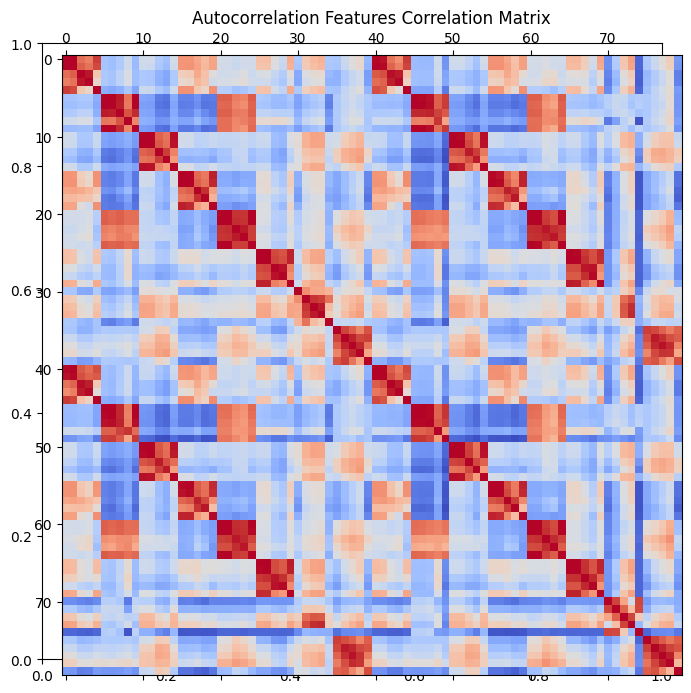

In [17]:
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(8, 8))
plt.matshow(dfFAutocorr.corr(), interpolation='nearest', fignum=1, cmap='coolwarm')
#plt.savefig('.png')
plt.title('Autocorrelation Features Correlation Matrix')
plt.show